<a href="https://colab.research.google.com/github/hr1378/ML-Projects/blob/main/01_neural_network_regression_in_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as skl


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
df.isna().value_counts()

,,,,,,,count
age,sex,bmi,children,smoker,region,charges,
False,False,False,False,False,False,False,1338


In [ ]:
df=pd.get_dummies(df,dtype=int)

In [ ]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
x=df.drop("charges",axis=1)

In [ ]:
y=df["charges"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from os import times_result
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=3)

In [ ]:
(len(x_train),
len(x_test),
len(y_train),
len(y_test))

(802, 536, 802, 536)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,pred)

In [ ]:
mse

35859137.39209932

In [ ]:
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])
insurance_model.fit(x_train,y_train,epochs=100)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11052.1162 - mae: 11052.1162   
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7390.2939 - mae: 7390.2939  
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9326.2744 - mae: 9326.2744   
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7582.5674 - mae: 7582.5674 
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7801.0991 - mae: 7801.0991   
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8382.7881 - mae: 8382.7881   
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7592.6528 - mae: 7592.6528 
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8455.7246 - mae: 8455.7246   
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7483.2866 - mae: 7483.2866 
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8267.6768 - mae: 8267.6768   
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8347.5361 - mae: 8347.5361   
Epoch 12/100
26/26 ━━━━━

In [ ]:
insurance_model.evaluate(x_test,y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6749.6699 - mae: 6749.6699  


[7056.3203125, 7056.3203125]

In [ ]:
y.median(),y.mean()

(9382.033, 13270.422265141257)

In [ ]:
x.median(),x.mean()

(age                 39.0
 bmi                 30.4
 children             1.0
 sex_female           0.0
 sex_male             1.0
 smoker_no            1.0
 smoker_yes           0.0
 region_northeast     0.0
 region_northwest     0.0
 region_southeast     0.0
 region_southwest     0.0
 dtype: float64,
 age                 39.207025
 bmi                 30.663397
 children             1.094918
 sex_female           0.494768
 sex_male             0.505232
 smoker_no            0.795217
 smoker_yes           0.204783
 region_northeast     0.242152
 region_northwest     0.242900
 region_southeast     0.272048
 region_southwest     0.242900
 dtype: float64)

In [ ]:
y_train.median(),y_train.mean()

(9384.625349999998, 13248.331096832919)

In [ ]:
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])
model2.fit(x_train,y_train,epochs=100,verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13638.9141 - mae: 13638.9141
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13157.4023 - mae: 13157.4023 
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12250.5400 - mae: 12250.5400  
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10219.2969 - mae: 10219.2969  
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7571.2251 - mae: 7571.2251 
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7535.5615 - mae: 7535.5615 
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7729.4678 - mae: 7729.4678  
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7397.6572 - mae: 7397.6572  
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7469.2173 - mae: 7469.2173  
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7162.0244 - mae: 7162.0244 
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7128.6050 - mae: 7128.6050 
Epoch 12/100
26/26 ━━━━━━━━━━

In [ ]:
insurance_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133 (536.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
insurance_model.evaluate(x_train,y_train)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7520.8633 - mae: 7520.8633 


[7133.22021484375, 7133.22021484375]

In [ ]:
model2.evaluate(x_train,y_train)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4130.0483 - mae: 4130.0483


[3790.4345703125, 3790.4345703125]

In [ ]:
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model3.compile(loss='mae',
               optimizer='adam',
               metrics=['mae'])
history=model3.fit(x_train,y_train,epochs=200,verbose=1)

Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12963.4395 - mae: 12963.4395
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13510.5859 - mae: 13510.5859 
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11573.8594 - mae: 11573.8594 
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10207.5488 - mae: 10207.5488 
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8769.8936 - mae: 8769.8936   
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6933.9854 - mae: 6933.9854 
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7239.9980 - mae: 7239.9980  
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7445.0967 - mae: 7445.0967  
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7187.7383 - mae: 7187.7383 
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7840.3833 - mae: 7840.3833 
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7154.8213 - mae: 7154.8213  
Epoch 12/200
26/26 ━━━━━━━━━━

Text(0, 0.5, 'epochs')

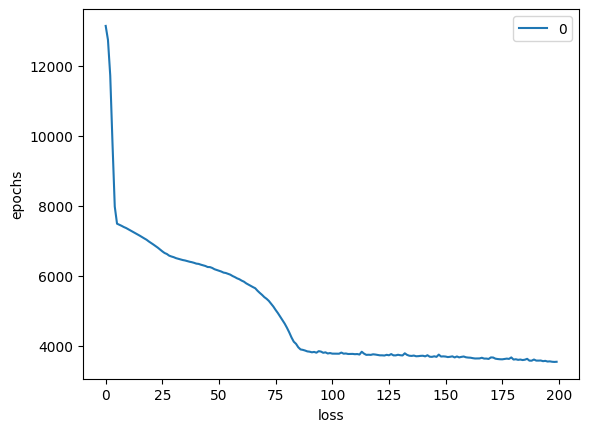

In [ ]:
pd.DataFrame(history.history['loss']).plot()
plt.xlabel("loss")
plt.ylabel("epochs")

<Axes: ylabel='Frequency'>

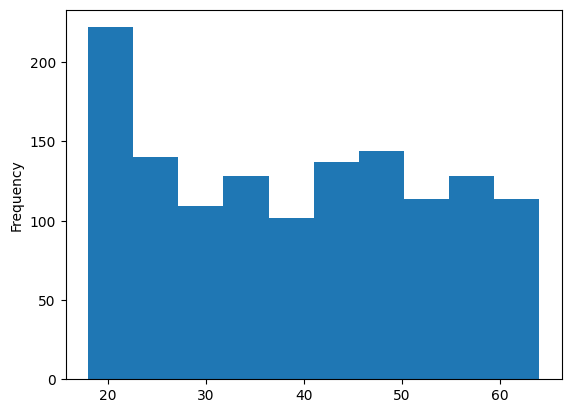

In [ ]:
x['age'].plot(kind="hist")

<Axes: ylabel='Frequency'>

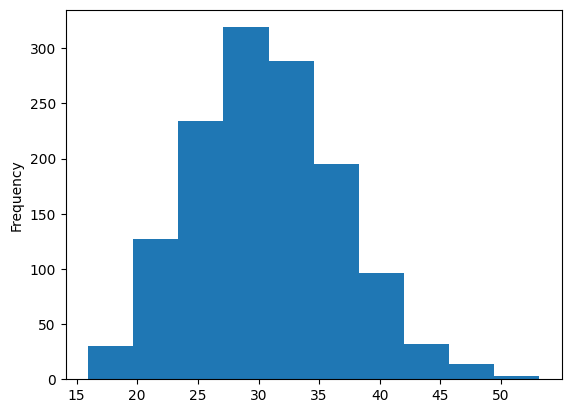

In [ ]:
x["bmi"].plot(kind="hist")

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
ct=make_column_transformer((MinMaxScaler(),["age","bmi","children"]),
(OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]))

In [ ]:
X=df.drop("charges",axis=1)

In [ ]:
y=df["charges"]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
ct.fit(xtrain)
xtrain=ct.transform(xtrain)
xtest=ct.transform(xtest)

In [ ]:
xtrain[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
xtrain.shape

(1070, 11)

In [ ]:
tf.random.set_seed(42)

In [ ]:
model4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])
model4.fit(xtrain,ytrain,epochs=100,verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13294.8691 - mae: 13294.8691
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13265.8359 - mae: 13265.8359 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13159.2217 - mae: 13159.2217 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12888.0049 - mae: 12888.0049 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12349.4912 - mae: 12349.4912 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11462.4346 - mae: 11462.4346 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10369.4990 - mae: 10369.4990
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9289.3994 - mae: 9289.3994 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8470.0869 - mae: 8470.0869 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8029.2100 - mae: 8029.2100 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7846.4453 - mae: 7846.4453 
Epoch 12/100
34/34 ━━━━━━━━━━

In [ ]:
model4.evaluate(xtest,ytest)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3213.9338 - mae: 3213.9338  


[3160.41259765625, 3160.41259765625]

In [ ]:
model4.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,205 (133.62 KB)

 Trainable params: 11,401 (44.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,804 (89.08 KB)

In [ ]:
model2.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,205 (133.62 KB)

 Trainable params: 11,401 (44.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,804 (89.08 KB)